In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
matplotlib.rcParams['figure.figsize'] = [10, 7]

basic function h(x) = a1*x1 + x0

In [59]:
from sklearn import datasets
data = datasets.load_iris()
iris = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df = iris.copy(deep=True)
df['target'] = data['target']

In [60]:
iris['target'] = df.target
iris = iris[iris.target != 0]
iris = iris.drop(['target'], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
x = np.array(iris)
y = np.array(df[df.target!=0].target)


In [62]:
X = np.c_[np.ones(100), x]

In [63]:
# Y = np.array([3, 5, 5, 6, 11])
# X = np.array([np.ones(5), np.array([0, 1, 2, 3, 4])])


def loss_function(n_iter):
    alpha = 0.01
    loss = []
    thetas = np.ones((100, 2))
    theta = np.array([1, 1, 1, 1, 1])
    history = []
    gradients = []
    for _ in range(n_iter):
        sigmoid = 1/(1-np.exp(-np.dot(X, theta)))
        J = (1/200)*np.sum(np.square(np.dot(X, theta) - y))
        loss.append(J)
        
        
        grad = X.T.dot(X.dot(theta)-y)/100
        theta = theta - alpha*grad
        history.append(theta)
        gradients.append(grad)
    return loss, theta, history, gradients

In [64]:
def loss_function(n_iter):
    alpha = 0.01
    loss = []
    thetas = np.ones((100, 2))
    theta = np.array([1, 1, 1, 1, 1])
    history = []
    gradients = []
    for _ in range(n_iter):
        sigmoid = 1/(1-np.exp(-np.dot(X, theta)))
        J = (1/(2*len(y)))*np.sum(np.square(sigmoid - y))
        loss.append(J)
        
        
        grad = X.T.dot(X.dot(theta)-y)/100
        theta = theta - alpha*grad
        history.append(theta)
        gradients.append(grad)
    return loss, theta, history, gradients

In [65]:
l, t, h, g = loss_function(2000)

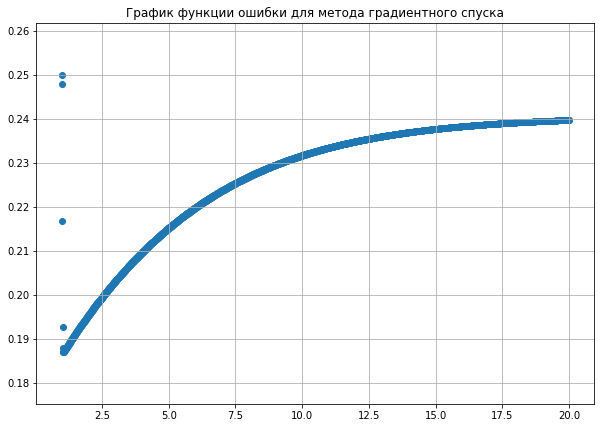

In [66]:
z = np.linspace(1, 20, len(l))
plt.scatter(z, l)
plt.title('График функции ошибки для метода градиентного спуска')
plt.grid()
plt.show()

In [10]:
def print_accuracy(theta):
    preds = []
    for _ in range(len(X)):
        pred = np.dot(X[_], theta.T)
        preds.append(pred)
    compare = np.array(preds)
    comp = np.c_[y, compare]
    err = []
    for _ in comp:
        err.append(abs(_[0] - _[1]))
    error = pd.DataFrame(err)
    print('Точность оценки {:.2%}'.format((1-error.mean()[0])))

In [11]:
print_accuracy(t)

Точность оценки 81.09%


Получилось поменьше чем дает лог регрессия в sklearn

In [12]:
lin_x = np.linspace(1, 20, 100)
lin_y = 3*lin_x + 3 + lin_x**2 + 30*np.random.randn(100)
lin_f = 3*lin_x + 3 + lin_x**2

In [13]:
# Реализуем метод скользящего среднего для функции lin_у (выше)
gamma = 0.9
Vt = []
for _ in range(len(lin_y)):
    try:
        Vavg = (lin_y[_] + lin_y[_+1] + lin_y[_+2] + lin_y[_+3]\
                + lin_y[_+4] + lin_y[_+5] + lin_y[_+6] + lin_y[_+7]\
               + lin_y[_+8] + lin_y[_+9] + lin_y[_+10] + lin_y[_+11]\
               + lin_y[_+12] + lin_y[_+13] + lin_y[_+14] + lin_y[_+15])/16
        V = lin_y[_+16]*(1-gamma) + (gamma)*Vavg
        Vt.append(V)
    except:
        pass

На графике ниже продемонстрирован принцип сглаживания кривой на основе скользящего среднего  
Метод Нестерова предлагает нам (как я понял) использовать функцию скользящего среднего для оптимизации градиента  
и последующей оценки весов theta не по градиенту а по вот это вот функции

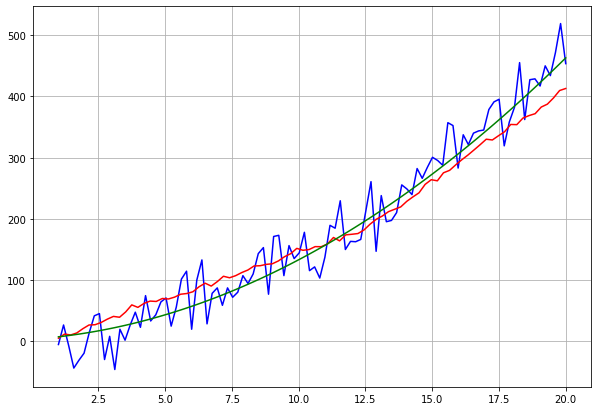

In [14]:
z1 = np.linspace(1, 20, len(Vt))
plt.plot(lin_x, lin_y, 'b') # lin_y = 3*x + 3 + x**2 + 30*np.random.randn(100)
plt.plot(z1, Vt, 'r') # Сглаженная функция, чем больше гамма, тем менее острая она получается
plt.plot(lin_x, lin_f, 'g') # lin_f = 3*x + x**2 + 3
plt.grid()
plt.show()

In [15]:
# Нужно накопить несколько точек функции ошибки методом град спуска, чтобы было от чего брать среднее
history = []
def nesterov(n_iter):
    alpha = 0.001
    loss = []
    thetas = np.ones((100, 2))
    theta = np.array([1, 1, 1, 1, 1])
    
    gradients = []
    for _ in range(10):
        sigmoid = 1/(1-np.exp(-np.dot(X, theta)))
        J = (1/200)*np.sum(np.square(sigmoid - y))
        
        
        grad = X.T.dot(X.dot(theta) - y)/len(y)
        gradients.append(grad) 
        theta = theta - alpha*grad
        
    

    return gradients, theta, alpha

speeds = []
gamma = 0.9

def nes(n_iter):
    gradients, theta, alpha = nesterov(n_iter)
    for _ in range(n_iter-10):
        sigmoid = 1/(1-np.exp(-np.dot(X, theta)))
        J = (1/200)*np.sum(np.square(sigmoid - y))
        
        grad = X.T.dot(X.dot(theta)-y)/len(y)
        gradients.append(grad)
        
        theta = theta - alpha*(gradients[_-1]*(1-gamma) + gradients[_]*(gamma))
        
        speeds.append(J)
        history.append(theta)
    
    return gradients, theta, speeds, history
        

In [16]:
g, t, s, h = nes(2000)

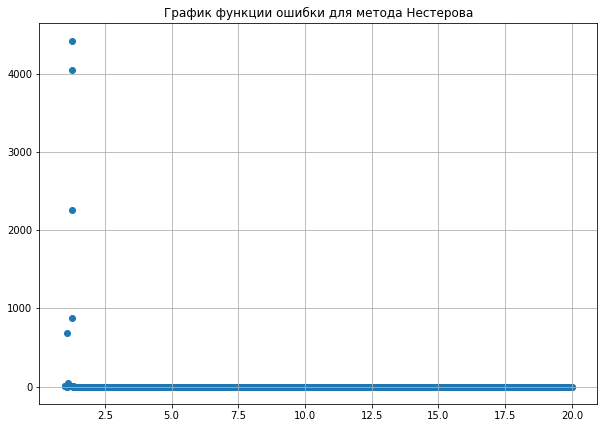

In [57]:
z = np.linspace(1, 20, len(s))
plt.scatter(z, s)
plt.title('График функции ошибки для метода Нестерова')
plt.grid()
plt.show()

In [18]:
print_accuracy(t)

Точность оценки 72.76%


Либо ошибка моя, либо подход неверен, ко всему прочему для данного случая не имеет разницы какой параметр  
гамма задавать

In [51]:
def RMSProp(n_iter):
    alpha = 0.1
    loss = []
    history = []
    thetas = np.ones((100, 2))
    theta = np.array([1, 1, 1, 1, 1])
    u = 10**(-6) # Сглаживающий параметр
    gradients = []
    for _ in range(n_iter):
        sigmoid = 1/(1-np.exp(-np.dot(X, theta)))
        J = (1/200)*np.sum(np.square(sigmoid - y))
        
        loss.append(J)
        grad = X.T.dot(X.dot(theta)-y)/len(y)
        gradients.append(grad**2)
        Eg = np.mean(gradients[_])
        theta = theta - theta*(1-gamma)*(Eg + u)**(-1/2)*grad*alpha
        history.append(theta)
    return theta, gradients, loss, history

In [69]:
t, g, l, h = RMSProp(1000)

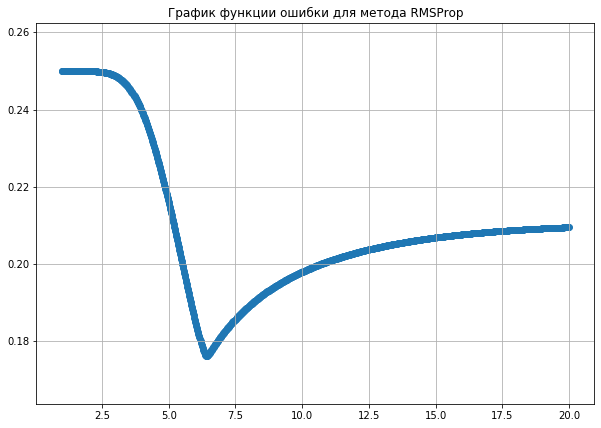

In [70]:
z = np.linspace(1, 20, len(l))
plt.scatter(z, l)
plt.title('График функции ошибки для метода RMSProp')
plt.grid()
plt.show()

In [71]:
print_accuracy(t)

Точность оценки 76.55%


Последннее что еще меня смутило, это то факт, что градиенты установлены точно такие же как и для лин регрессии  
Если брать частную производную от сигмоиды, то градиент будет записан так:  
2*X.T.dot(np.exp(-(X.dot(theta) - y)))/len(y)  
Однако, в этом случае функция ошибки вообще не изменяется, поэтому оставил:  
X.T.dot(X.dot(theta)-y)/len(y)